In [5]:
#Loading the csv file
import pandas as pd
df=pd.read_csv('Data/Daily weather data.csv')
df.head()

,date,temperature,humidity,wind_speed,meanpressure
0,01-01-2017,15.913043,85.869565,2.743478,59.000000
1,02-01-2017,18.500000,77.222222,2.894444,1018.277778
2,03-01-2017,17.111111,81.888889,4.016667,1018.333333
3,04-01-2017,18.700000,70.050000,4.545000,1015.700000
4,05-01-2017,18.388889,74.944444,3.300000,1014.333333


In [6]:
#Check for missing values
print(df.isnull().sum())

date            0
temperature     0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Data/Daily weather data.csv")

# Check column names
print(df.columns)

# Assume temperature and humidity columns are named 'temperature' and 'humidity'
# You may need to change these names based on your actual dataset

def get_weather(temp, humidity):
    if temp > 30 and humidity < 50:
        return 'Sunny'
    elif 20 <= temp <= 30 and 50 <= humidity <= 80:
        return 'Cloudy'
    elif temp < 25 and humidity > 80:
        return 'Rainy'
    elif temp < 10 and humidity > 70:
        return 'Foggy'
    elif temp > 30 and humidity > 70:
        return 'Hot & Humid'
    else:
        return 'Moderate'

# Apply the function
df['weather'] = df.apply(lambda row: get_weather(row['temperature'], row['humidity']), axis=1)

# Show the updated data
print(df[['temperature', 'humidity', 'wind_speed', 'meanpressure' , 'weather']].head())

Index(['date', 'temperature', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')
   temperature   humidity  wind_speed  meanpressure   weather
0    15.913043  85.869565    2.743478     59.000000     Rainy
1    18.500000  77.222222    2.894444   1018.277778  Moderate
2    17.111111  81.888889    4.016667   1018.333333     Rainy
3    18.700000  70.050000    4.545000   1015.700000  Moderate
4    18.388889  74.944444    3.300000   1014.333333  Moderate


In [8]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

#sunny-2
#rainy-1
#cloudy-0

In [9]:
# Features and Target
X = df[['humidity', 'wind_speed', 'meanpressure']]  # input
y = df['temperature']  # target

# For weather condition prediction
y2 = df['weather']  # classification target

In [10]:
from sklearn.model_selection import train_test_split

# For regression (temperature)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For classification (weather condition)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

# Predict temperature
y_pred = reg_model.predict(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf_model = RandomForestClassifier()
clf_model.fit(X_train2, y_train2)

# Predict weather condition
y_pred2 = clf_model.predict(X_test2)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Regression Metrics:
MAE: 2.2271571007695656
MSE: 8.721024069276591
RMSE: 8.721024069276591
R2 Score: 0.7760386934611212


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Classification Metrics:")
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))


Classification Metrics:
Accuracy: 0.8695652173913043
Confusion Matrix:
 [[ 1  1  0  0]
 [ 0 17  0  1]
 [ 0  0  0  1]
 [ 0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.94      0.94      0.94        18
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         2

    accuracy                           0.87        23
   macro avg       0.61      0.61      0.57        23
weighted avg       0.87      0.87      0.86        23



c:\Users\Satvik singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Satvik singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Satvik singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

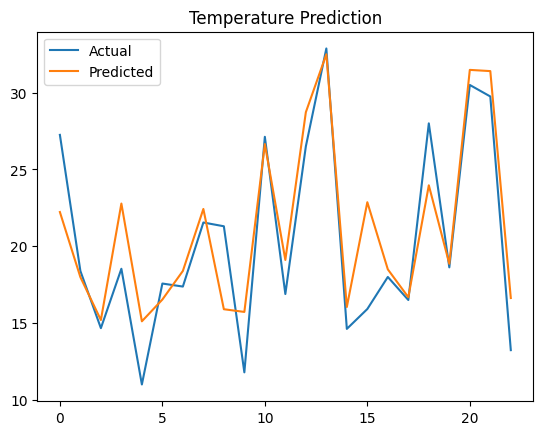

In [15]:
#Temperature prediction and visualization
import matplotlib.pyplot as plt

plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.legend()
plt.title("Temperature Prediction")
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred2)

0.8695652173913043

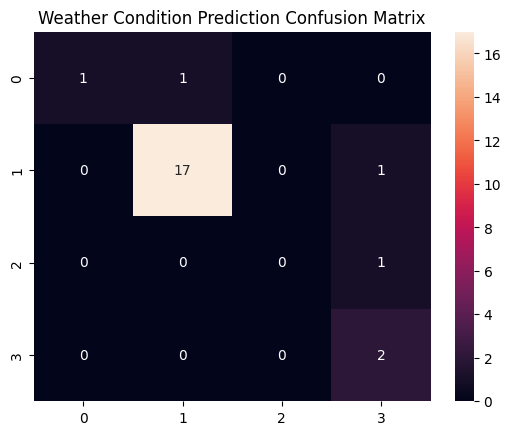

In [17]:
#Weather condition prediction confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True)
plt.title("Weather Condition Prediction Confusion Matrix")
plt.show()

In [17]:
new_data = [[50 , 30 , 1012]]  # example values for humidity, wind, pressure

# Predict temperature
temp_pred = reg_model.predict(new_data)
print("Predicted Temperature:", temp_pred)

# Predict weather condition
weather_pred = clf_model.predict(new_data)
print("Predicted Weather Condition:", le.inverse_transform(weather_pred))

Predicted Temperature: [23.1827803]
Predicted Weather Condition: ['Moderate']


c:\Users\Satvik singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Satvik singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
